In [1]:
import os
os.listdir()


['.ipynb_checkpoints',
 '01_Data_Analysis.ipynb',
 '02_Feature_Engineering.ipynb',
 '03_Baseline_Model.ipynb',
 '04_LSTM_Model.ipynb',
 '05_Dashboard_Visualization.ipynb',
 'app.py',
 'data',
 'lstm_energy_model.keras',
 'notebooks',
 'static',
 'target_scaler.pkl',
 'templates',
 'venv']

In [2]:
import os
os.listdir('data')

['.ipynb_checkpoints',
 'features_X.csv',
 'House_1.csv',
 'House_1_cleaned.csv',
 'House_1_cleaned_sampled.csv',
 'House_1_cleaned_sampled_x10.csv',
 'target_y.csv',
 'test_data.csv',
 'train_data.csv',
 'val_data.csv']

In [3]:
import pandas as pd

df = pd.read_csv('data/House_1.csv')
df.head()


,Time,Unix,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9
0,2013-10-09 13:06:17,1381323977,523,74,0,69,0,0,0,0,0,1
1,2013-10-09 13:06:31,1381323991,526,75,0,69,0,0,0,0,0,1
2,2013-10-09 13:06:46,1381324006,540,74,0,68,0,0,0,0,0,1
3,2013-10-09 13:07:01,1381324021,532,74,0,68,0,0,0,0,0,1
4,2013-10-09 13:07:15,1381324035,540,74,0,69,0,0,0,0,0,1


In [4]:
df.isnull().sum()

Time          0
Unix          0
Aggregate     0
Appliance1    0
Appliance2    0
Appliance3    0
Appliance4    0
Appliance5    0
Appliance6    0
Appliance7    0
Appliance8    0
Appliance9    0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.dtypes

Time          object
Unix           int64
Aggregate      int64
Appliance1     int64
Appliance2     int64
Appliance3     int64
Appliance4     int64
Appliance5     int64
Appliance6     int64
Appliance7     int64
Appliance8     int64
Appliance9     int64
dtype: object

In [7]:
df = df[(df != 0).all(axis=1)]

In [8]:
appliance_cols = [col for col in df.columns if 'Appliance' in col]
df = df[(df[appliance_cols] != 0).any(axis=1)]

In [9]:
df = pd.read_csv('data/House_1.csv')


In [10]:
appliance_cols = [col for col in df.columns if 'Appliance' in col]
appliance_cols

['Appliance1',
 'Appliance2',
 'Appliance3',
 'Appliance4',
 'Appliance5',
 'Appliance6',
 'Appliance7',
 'Appliance8',
 'Appliance9']

In [11]:
df = df[(df[appliance_cols] != 0).all(axis=1)]

In [12]:
appliance_cols = [col for col in df.columns if 'Appliance' in col]
appliance_cols

['Appliance1',
 'Appliance2',
 'Appliance3',
 'Appliance4',
 'Appliance5',
 'Appliance6',
 'Appliance7',
 'Appliance8',
 'Appliance9']

In [13]:
# reload original to be safe
df = pd.read_csv('data/House_1.csv')

# identify appliance columns
appliance_cols = [c for c in df.columns if 'Appliance' in c]

# count how many appliances are ON in each row
active_count = (df[appliance_cols] != 0).sum(axis=1)

# attach the count so you can inspect
df['active_count'] = active_count

# quick stats
print("Total rows:", len(df))
print("Rows with at least one appliance ON:", (active_count > 0).sum())
print("Rows with all appliances ON:", (active_count == len(appliance_cols)).sum())

# distribution summary
print(df['active_count'].describe())

# show top counts and a small sample
print("\nTop counts frequency:")
print(df['active_count'].value_counts().sort_index().head(10))
df[df['active_count']>0].head(10)

Total rows: 6960008
Rows with at least one appliance ON: 6944407
Rows with all appliances ON: 0
count    6.960008e+06
mean     2.296911e+00
std      1.001691e+00
min      0.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      7.000000e+00
Name: active_count, dtype: float64

Top counts frequency:
active_count
0      15601
1    1575238
2    2672586
3    1876066
4     675723
5     133771
6      10998
7         25
Name: count, dtype: int64


,Time,Unix,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9,active_count
0,2013-10-09 13:06:17,1381323977,523,74,0,69,0,0,0,0,0,1,3
1,2013-10-09 13:06:31,1381323991,526,75,0,69,0,0,0,0,0,1,3
2,2013-10-09 13:06:46,1381324006,540,74,0,68,0,0,0,0,0,1,3
3,2013-10-09 13:07:01,1381324021,532,74,0,68,0,0,0,0,0,1,3
4,2013-10-09 13:07:15,1381324035,540,74,0,69,0,0,0,0,0,1,3
5,2013-10-09 13:07:18,1381324038,539,74,0,69,0,0,0,0,0,1,3
6,2013-10-09 13:07:30,1381324050,537,74,0,69,0,0,0,0,0,1,3
7,2013-10-09 13:07:32,1381324052,537,74,0,69,0,0,0,0,0,1,3
8,2013-10-09 13:07:44,1381324064,548,74,0,69,0,0,0,0,0,1,3
9,2013-10-09 13:07:47,1381324067,557,73,0,68,0,0,0,0,0,1,3


In [14]:
appliance_cols = [c for c in df.columns if 'Appliance' in c]
df = df[(df[appliance_cols] != 0).any(axis=1)]
df.shape


(6944407, 13)

In [15]:
df = df[df['active_count'] >= 3].copy()
df.shape


(2696583, 13)

In [16]:
df['Time'] = pd.to_datetime(df['Time'])


In [17]:
df = df.set_index('Time')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2696583 entries, 2013-10-09 13:06:17 to 2015-07-10 11:25:51
Data columns (total 12 columns):
 #   Column        Dtype
---  ------        -----
 0   Unix          int64
 1   Aggregate     int64
 2   Appliance1    int64
 3   Appliance2    int64
 4   Appliance3    int64
 5   Appliance4    int64
 6   Appliance5    int64
 7   Appliance6    int64
 8   Appliance7    int64
 9   Appliance8    int64
 10  Appliance9    int64
 11  active_count  int64
dtypes: int64(12)
memory usage: 267.5 MB


In [19]:
df.describe()

,Unix,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9,active_count
count,2.696583e+06,2.696583e+06,2.696583e+06,2.696583e+06,2.696583e+06,2.696583e+06,2.696583e+06,2.696583e+06,2.696583e+06,2.696583e+06,2.696583e+06,2.696583e+06
mean,1.410016e+09,5.721447e+02,3.291021e+01,2.848139e+01,4.856783e+01,3.993251e+00,2.195608e+01,2.163019e+01,5.204303e+00,1.160909e+01,4.820194e+01,3.362073e+00
std,1.532174e+07,9.149469e+02,5.107508e+01,3.256373e+01,3.825795e+01,8.331698e+01,2.025761e+02,2.179059e+02,1.669031e+01,1.632361e+01,2.156863e+02,5.956287e-01
min,1.381324e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,1.398541e+09,2.420000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00
50%,1.409877e+09,3.170000e+02,0.000000e+00,4.500000e+01,6.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00
75%,1.422718e+09,5.190000e+02,7.300000e+01,4.700000e+01,7.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,1.000000e+00,4.000000e+00
max,1.436528e+09,2.915900e+04,3.072000e+03,2.093000e+03,2.734000e+03,3.584000e+03,3.072000e+03,2.525000e+03,2.094000e+03,2.048000e+03,2.119000e+03,7.000000e+00


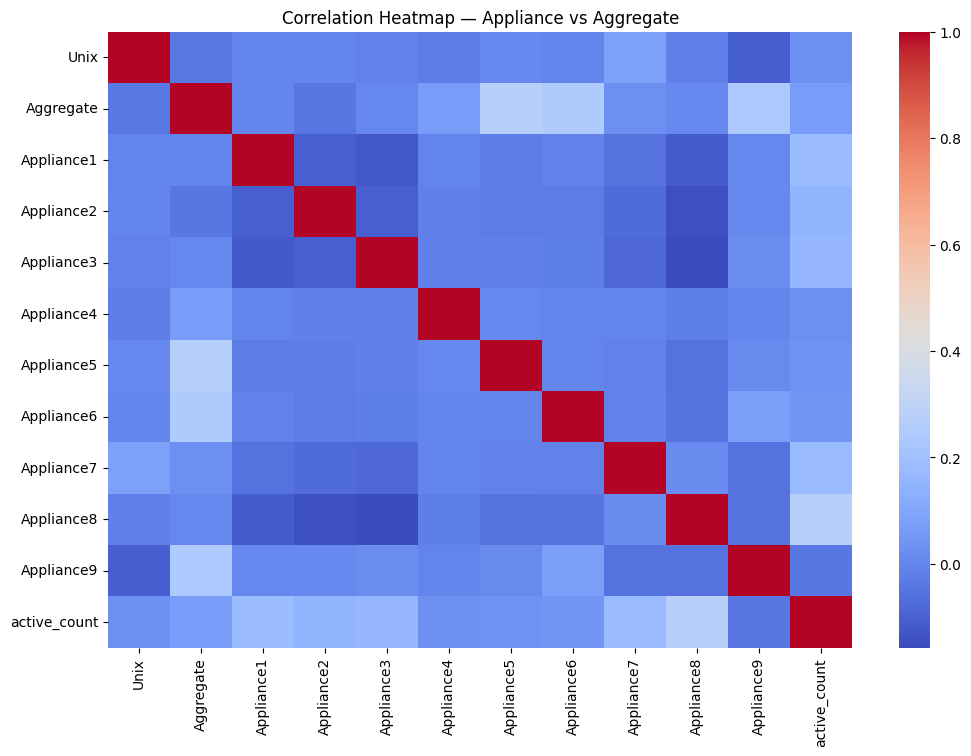

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap — Appliance vs Aggregate")
plt.show()

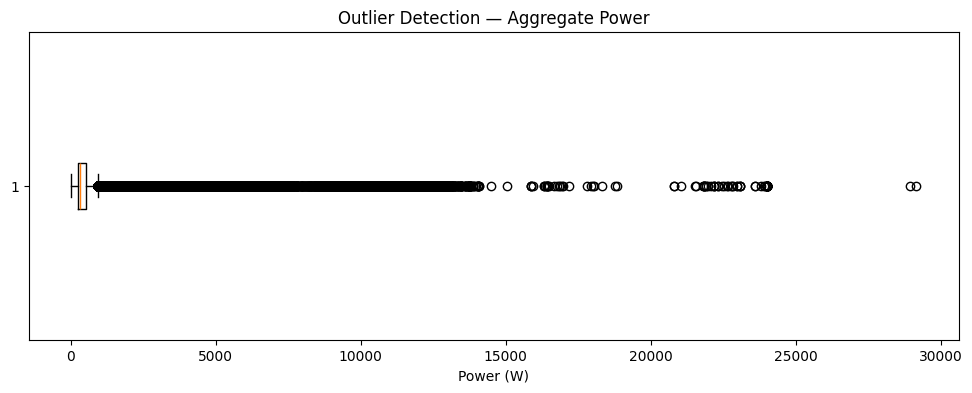

In [21]:
plt.figure(figsize=(12,4))
plt.boxplot(df['Aggregate'], vert=False)
plt.title("Outlier Detection — Aggregate Power")
plt.xlabel("Power (W)")
plt.show()

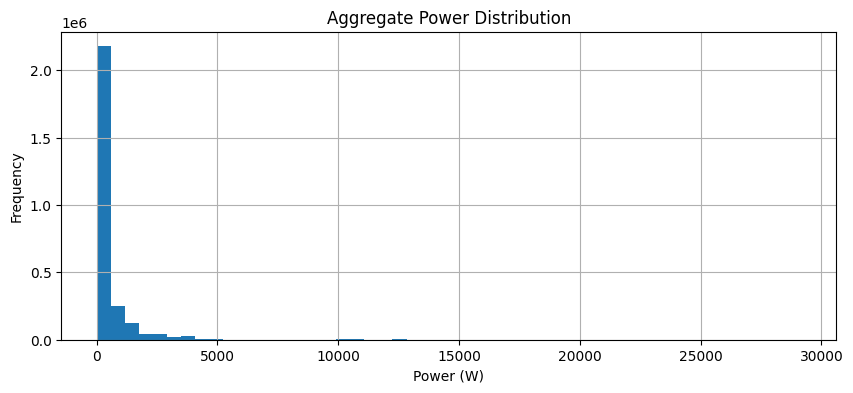

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
df['Aggregate'].hist(bins=50)
plt.title("Aggregate Power Distribution")
plt.xlabel("Power (W)")
plt.ylabel("Frequency")
plt.show()

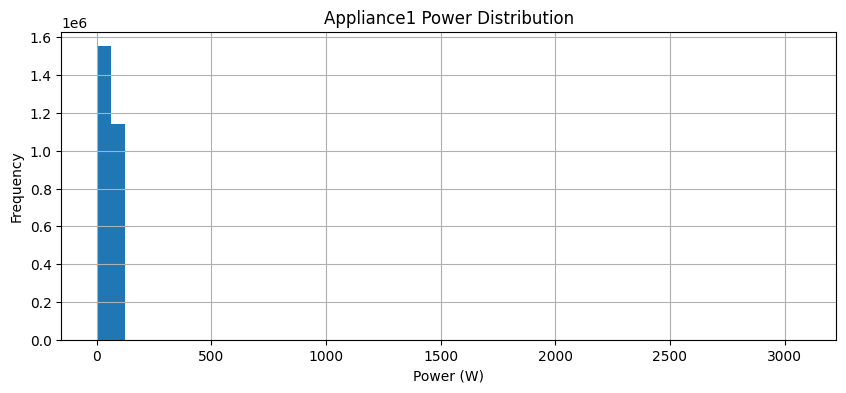

In [23]:
#Fridge / Freezer type
plt.figure(figsize=(10,4))
df['Appliance1'].hist(bins=50)
plt.title("Appliance1 Power Distribution")
plt.xlabel("Power (W)")
plt.ylabel("Frequency")
plt.show()

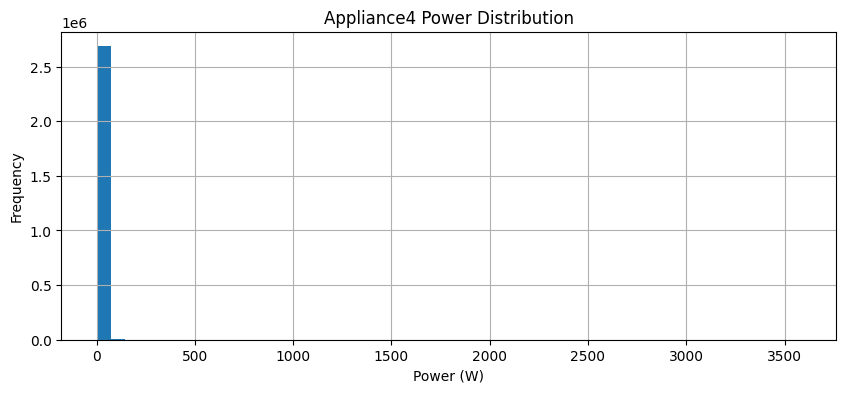

In [24]:
#Dryer — high spikes
plt.figure(figsize=(10,4))
df['Appliance4'].hist(bins=50)
plt.title("Appliance4 Power Distribution")
plt.xlabel("Power (W)")
plt.ylabel("Frequency")
plt.show()

In [25]:
import pandas as pd

# reload original raw file
df = pd.read_csv('data/House_1.csv')
print("original shape:", df.shape)


original shape: (6960008, 12)


In [26]:
# identify appliance columns and create active_count
appliance_cols = [c for c in df.columns if 'Appliance' in c]
df['active_count'] = (df[appliance_cols] != 0).sum(axis=1)

# keep only rows with at least 3 appliances ON
df = df[df['active_count'] >= 3].copy()

print("filtered shape (active_count >= 3):", df.shape)


filtered shape (active_count >= 3): (2696583, 13)


In [27]:
df['Time'] = pd.to_datetime(df['Time'])
df = df.set_index('Time')
print("index set; head:")
display(df.head())


index set; head:


,Unix,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9,active_count
Time,,,,,,,,,,,,
2013-10-09 13:06:17,1381323977,523,74,0,69,0,0,0,0,0,1,3
2013-10-09 13:06:31,1381323991,526,75,0,69,0,0,0,0,0,1,3
2013-10-09 13:06:46,1381324006,540,74,0,68,0,0,0,0,0,1,3
2013-10-09 13:07:01,1381324021,532,74,0,68,0,0,0,0,0,1,3
2013-10-09 13:07:15,1381324035,540,74,0,69,0,0,0,0,0,1,3


In [28]:
print("final df shape:", df.shape)
df[['Unix','Aggregate','Appliance1','active_count']].head()


final df shape: (2696583, 12)


,Unix,Aggregate,Appliance1,active_count
Time,,,,
2013-10-09 13:06:17,1381323977,523,74,3
2013-10-09 13:06:31,1381323991,526,75,3
2013-10-09 13:06:46,1381324006,540,74,3
2013-10-09 13:07:01,1381324021,532,74,3
2013-10-09 13:07:15,1381324035,540,74,3


In [29]:
df.to_csv('data/House_1_cleaned.csv', index=False)

In [30]:
import os
os.path.getsize('data/House_1_cleaned.csv')/1024/1024  # size in MB

99.21590423583984

In [31]:
# sample every 5th row (adjust stride as needed)
df_sample = df.iloc[::5].reset_index(drop=False)
df_sample.to_csv('data/House_1_cleaned_sampled.csv', index=False)
print("sampled shape:", df_sample.shape)


sampled shape: (539317, 13)


In [32]:
df_sample10 = df.iloc[::10].reset_index()
df_sample10.to_csv('data/House_1_cleaned_sampled_x10.csv', index=False)

In [33]:
import os
os.path.getsize('data/House_1_cleaned_sampled_x10.csv') / 1024 / 1024

15.06507396697998

In [34]:
df.shape

(2696583, 12)

In [35]:
df = df.rename(columns={
    'Appliance1': 'Fridge',
    'Appliance2': 'Chest_Freezer',
    'Appliance3': 'Upright_Freezer',
    'Appliance4': 'Tumble_Dryer',
    'Appliance5': 'Washing_Machine',
    'Appliance6': 'Dishwasher',
    'Appliance7': 'Computer_Site',
    'Appliance8': 'Television_Site',
    'Appliance9': 'Heater'
})

In [36]:
df.columns

Index(['Unix', 'Aggregate', 'Fridge', 'Chest_Freezer', 'Upright_Freezer',
       'Tumble_Dryer', 'Washing_Machine', 'Dishwasher', 'Computer_Site',
       'Television_Site', 'Heater', 'active_count'],
      dtype='object')

In [37]:
appliance_cols = [
    'Fridge', 'Chest_Freezer', 'Upright_Freezer',
    'Tumble_Dryer', 'Washing_Machine', 'Dishwasher',
    'Computer_Site', 'Television_Site', 'Heater'
]

df['active_count'] = (df[appliance_cols] != 0).sum(axis=1)


In [38]:
df[['active_count']].describe()

,active_count
count,2.696583e+06
mean,3.362073e+00
std,5.956287e-01
min,3.000000e+00
25%,3.000000e+00
50%,3.000000e+00
75%,4.000000e+00
max,7.000000e+00


In [39]:
df_hourly = df.resample('H').mean()
df_hourly.shape

C:\Users\keert\AppData\Local\Temp\ipykernel_6004\3422298121.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').mean()


(15335, 12)

In [40]:
df_daily = df.resample('d').mean()
df_daily.shape


(640, 12)

In [41]:
df_model = df_hourly.copy()
df_model.shape


(15335, 12)

In [42]:
X = df_model.drop(columns=['active_count'])
X.head()

,Unix,Aggregate,Fridge,Chest_Freezer,Upright_Freezer,Tumble_Dryer,Washing_Machine,Dishwasher,Computer_Site,Television_Site,Heater
Time,,,,,,,,,,,
2013-10-09 13:00:00,1.381324e+09,546.944444,73.666667,0.000000,65.277778,0.000000,0.0,0.0,0.0,0.000000,1.0
2013-10-09 14:00:00,1.381329e+09,390.411765,0.358824,46.411765,68.323529,0.000000,0.0,0.0,0.0,0.000000,1.0
2013-10-09 15:00:00,1.381332e+09,180.746269,52.676617,49.079602,20.308458,0.000000,0.0,0.0,0.0,0.000000,1.0
2013-10-09 16:00:00,1.381338e+09,294.000000,38.125000,57.875000,73.375000,0.000000,0.0,0.0,0.0,0.000000,1.0
2013-10-09 17:00:00,1.381339e+09,308.201365,59.935154,33.187713,56.860068,0.027304,0.0,0.0,0.0,27.976109,1.0


In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(
    X_scaled,
    index=X.index,
    columns=X.columns
)

df_scaled.head()

,Unix,Aggregate,Fridge,Chest_Freezer,Upright_Freezer,Tumble_Dryer,Washing_Machine,Dishwasher,Computer_Site,Television_Site,Heater
Time,,,,,,,,,,,
2013-10-09 13:00:00,0.000000,0.033090,0.035970,0.000000,0.063070,0.000000,0.0,0.0,0.0,0.000000,0.000517
2013-10-09 14:00:00,0.000086,0.020433,0.000175,0.077353,0.066013,0.000000,0.0,0.0,0.0,0.000000,0.000517
2013-10-09 15:00:00,0.000147,0.003480,0.025721,0.081799,0.019622,0.000000,0.0,0.0,0.0,0.000000,0.000517
2013-10-09 16:00:00,0.000252,0.012638,0.018616,0.096458,0.070894,0.000000,0.0,0.0,0.0,0.000000,0.000517
2013-10-09 17:00:00,0.000276,0.013786,0.029265,0.055313,0.054937,0.000013,0.0,0.0,0.0,0.109282,0.000517


In [44]:
df_scaled.describe()


,Unix,Aggregate,Fridge,Chest_Freezer,Upright_Freezer,Tumble_Dryer,Washing_Machine,Dishwasher,Computer_Site,Television_Site,Heater
count,12734.000000,12734.000000,12734.000000,12734.000000,12734.000000,12734.000000,12734.000000,12734.000000,12734.000000,12734.000000,12734.000000
mean,0.504428,0.031973,0.015405,0.054007,0.051026,0.002040,0.007635,0.007618,0.010325,0.029006,0.033462
std,0.281002,0.041653,0.022297,0.028541,0.023752,0.028408,0.047020,0.063397,0.029828,0.049947,0.117766
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.292349,0.008727,0.000000,0.034874,0.035761,0.000000,0.000000,0.000000,0.000000,0.000000,0.000517
50%,0.505663,0.014541,0.012561,0.055376,0.056132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000517
75%,0.736869,0.038535,0.028240,0.076554,0.067575,0.000000,0.000000,0.000000,0.000000,0.039101,0.000517
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
df_scaled.shape

(15335, 11)

In [46]:
train_size = int(len(df_scaled) * 0.7)
val_size = int(len(df_scaled) * 0.15)

train_size, val_size

(10734, 2300)

In [47]:
train_data = df_scaled.iloc[:train_size]
val_data = df_scaled.iloc[train_size:train_size + val_size]
test_data = df_scaled.iloc[train_size + val_size:]

In [48]:
train_data.shape
val_data.shape
test_data.shape

(2301, 11)

In [49]:
train_data.to_csv('data/train_data.csv')
val_data.to_csv('data/val_data.csv')
test_data.to_csv('data/test_data.csv')

In [50]:
import pandas as pd

df = pd.read_csv("data/House_1_cleaned_sampled_x10.csv")
df.head()


,Time,Unix,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9,active_count
0,2013-10-09 13:06:17,1381323977,523,74,0,69,0,0,0,0,0,1,3
1,2013-10-09 13:07:59,1381324079,561,74,0,69,0,0,0,0,0,1,3
2,2013-10-09 14:11:32,1381327892,445,12,0,71,0,0,0,0,0,1,3
3,2013-10-09 14:19:59,1381328399,613,0,60,70,0,0,0,0,0,1,3
4,2013-10-09 14:20:59,1381328459,536,0,51,70,0,0,0,0,0,1,3


In [51]:
df.columns


Index(['Time', 'Unix', 'Aggregate', 'Appliance1', 'Appliance2', 'Appliance3',
       'Appliance4', 'Appliance5', 'Appliance6', 'Appliance7', 'Appliance8',
       'Appliance9', 'active_count'],
      dtype='object')

In [52]:
appliance_mapping = {
    'Appliance1': 'Fridge',
    'Appliance2': 'Freezer',
    'Appliance3': 'Washing_Machine',
    'Appliance4': 'Dishwasher',
    'Appliance5': 'Computer',
    'Appliance6': 'Television',
    'Appliance7': 'Microwave',
    'Appliance8': 'Kettle',
    'Appliance9': 'Toaster'
}

In [53]:
df.rename(columns=appliance_mapping, inplace=True)


In [54]:
df.columns


Index(['Time', 'Unix', 'Aggregate', 'Fridge', 'Freezer', 'Washing_Machine',
       'Dishwasher', 'Computer', 'Television', 'Microwave', 'Kettle',
       'Toaster', 'active_count'],
      dtype='object')

In [55]:
df.to_csv("data/House_1_cleaned_named.csv", index=False)
